In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import sklearn as skl
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import Ridge
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

#Задание 2
Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).


In [ ]:
cols_name = ['Type', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',\
             'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',\
             'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

In [ ]:
wine = pd.read_csv("wine.data.txt", header = None)
wine.columns = cols_name
wine

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


**Описание DataFrame:**
Эти данные являются результатами химического анализа вин, выращенных в одном и том же регионе Италии, но полученных из трех разных сортов. Анализ определил количество 13 компонентов, обнаруженных в каждом из трех типов вин.

**Атрибуты:**
1. Алкоголь
2. Яблочная кислота
3. Зола
4. Щелочность золы
5. Магний
6. Общие фенолы
7. Флавоноиды
8. Нефлаваноидные фенолы
9. Проантоцианы
10. Интенсивность цвета
11. Оттенок
12. OD280/OD315 разбавленных вин
13. Пролин

#Задание 2
Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [ ]:
print("Размер набора данных до удаления:", wine.shape)
wine = wine.drop_duplicates()
print("Размер набора данных после удаления:", wine.shape)

Размер набора данных до удаления: (178, 14)
Размер набора данных после удаления: (178, 14)


#Задание 3
Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

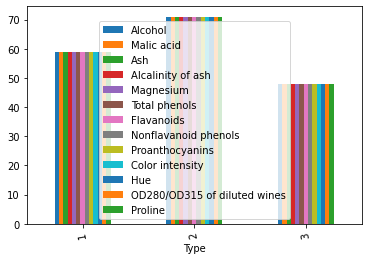

In [ ]:
wine.groupby('Type').count().plot(kind='bar',rot=100)

#Задание 4
Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

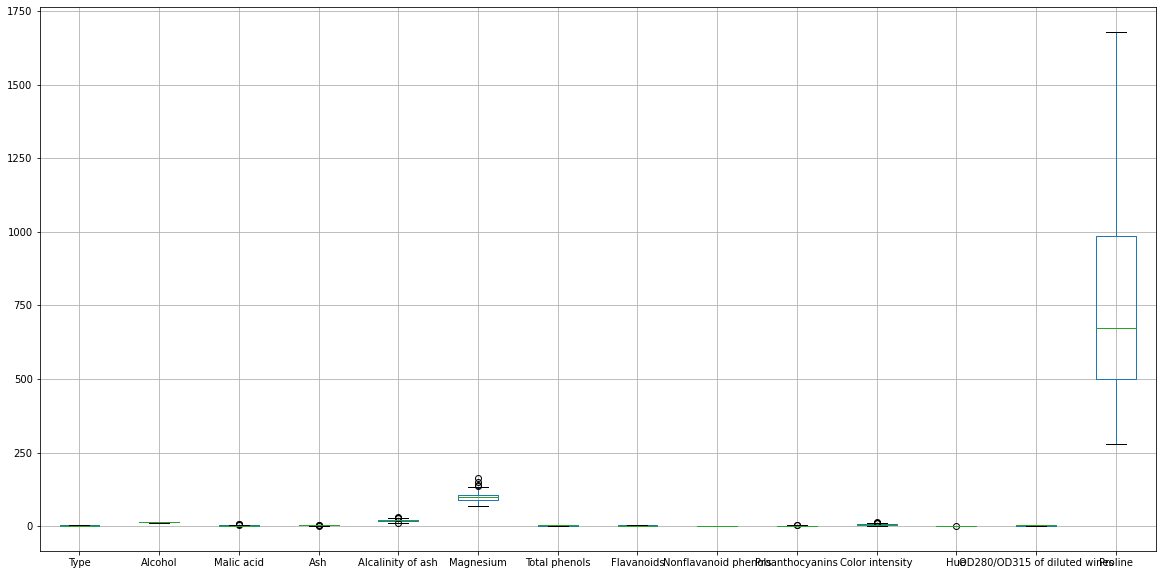

In [ ]:
fig=plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
wine.boxplot()

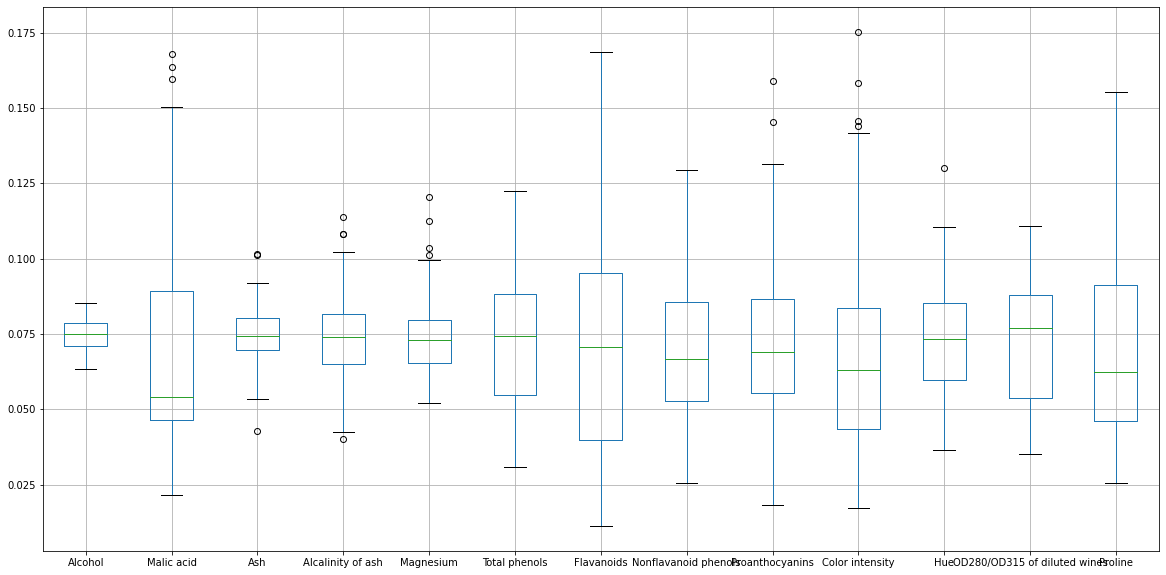

In [ ]:
d = preprocessing.normalize(np.array(wine.drop('Type', axis=1)), axis=0)
wine_scaled = pd.DataFrame(d, columns = cols_name[1:])
wine_scaled

fig=plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
wine_scaled.boxplot()

#Задание 6
Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

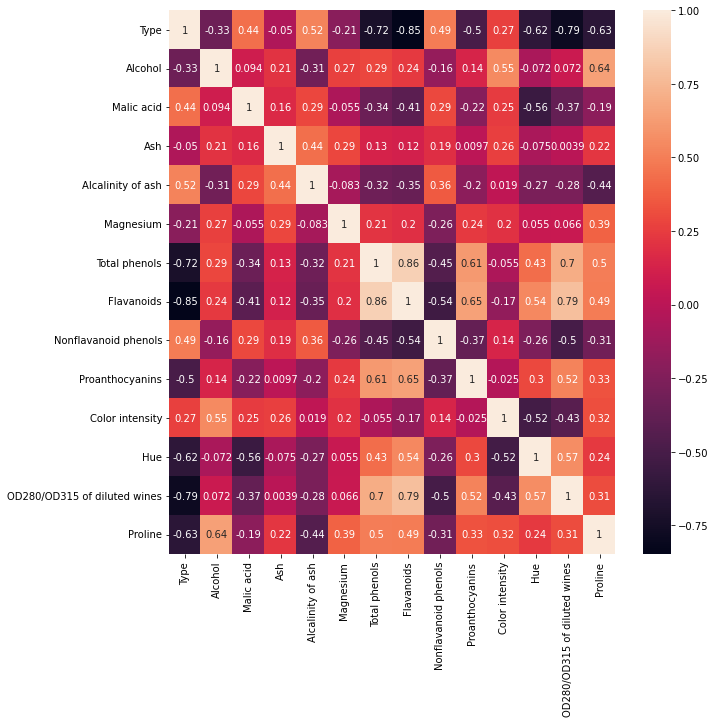

In [ ]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(wine.corr(), annot=True)

#Задание 7
Заполните пропущенные значения в данных;

In [ ]:
wine.count().isna()

Type                            False
Alcohol                         False
Malic acid                      False
Ash                             False
Alcalinity of ash               False
Magnesium                       False
Total phenols                   False
Flavanoids                      False
Nonflavanoid phenols            False
Proanthocyanins                 False
Color intensity                 False
Hue                             False
OD280/OD315 of diluted wines    False
Proline                         False
dtype: bool

#Задание 8
Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 

##Разбиение выборки

In [ ]:
y = np.array(wine['Type']) 
x = wine_scaled

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state = 5)

print('Тестовая выборка ', x_test.shape)
print('Тренировочная выборка', x_train.shape)



Тестовая выборка  (63, 13)
Тренировочная выборка (115, 13)


##Классификатор K ближайших соседей (задаётся количество ближайших объектов)

In [ ]:
knn = KNeighborsClassifier()
search = GridSearchCV(knn, {
    'n_neighbors': [x for x in range(1, 10)],
    'weights' : ['distance', 'uniform'],
    'metric' : ['euclidean' , 'manhattan']
    })
search.fit(x_train, y_train)

knn_best_params = search.best_params_
knn_best_score = search.best_score_

print("Лучшие параметры", knn_best_params)

Лучшие параметры {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}


In [ ]:
knn = KNeighborsClassifier(**knn_best_params)
knn.fit(x_train, y_train)
print("Значение точности для обучающей выборки: ", accuracy_score(y_train, knn.predict(x_train)))
print("Значение точности для тестовой выборки: ", accuracy_score(y_test, knn.predict(x_test)))


Значение точности для обучающей выборки:  1.0
Значение точности для тестовой выборки:  0.9365079365079365


##Логический классификатор (бинарное решающее дерево).

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)
search = GridSearchCV(clf, {
    'criterion': ['entropy', 'gini'],
    'max_depth' :  [x for x in range(1, 10)],
    'max_features' : [x for x in range(1, 10)]
    })
search.fit(x_train, y_train)
clf_best_params = search.best_params_
clf_best_score = search.best_score_

print("Лучшие параметры", clf_best_params)


Лучшие параметры {'criterion': 'gini', 'max_depth': 6, 'max_features': 5}


In [ ]:
clf = DecisionTreeClassifier(**clf_best_params)
clf.fit(x_train, y_train)
print("Значение точности для обучающей выборки: ", accuracy_score(y_train, clf.predict(x_train)))
print("Значение точности для тестовой выборки: ", accuracy_score(y_test, clf.predict(x_test)))

Значение точности для обучающей выборки:  1.0
Значение точности для тестовой выборки:  0.9047619047619048


##Один против всех

In [ ]:
y_bin = label_binarize(y, classes=[*range(1, 4)])
x_bin_train, x_bin_test, y_bin_train, y_bin_test = train_test_split(x, y_bin, random_state = 42)

knn = OneVsRestClassifier(knn)
knn.fit(x_bin_train, y_bin_train)
y_score_knn = knn.predict_proba(x_bin_test)

clf = OneVsRestClassifier(clf)
clf.fit(x_bin_train, y_bin_train)
y_score_clf = clf.predict_proba(x_bin_test)

###PR кривые

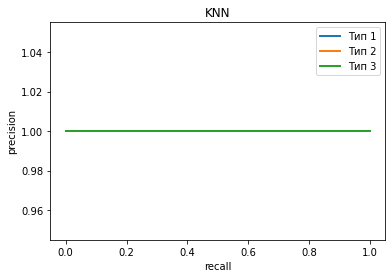

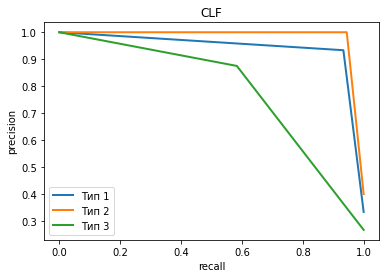

In [ ]:
precision = dict()
recall = dict()


for i in range(3):
    precision[i], recall[i], _ = precision_recall_curve(y_bin_test[:, i], y_score_knn[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='Тип {}'.format(i+1))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("KNN")
plt.show()


for i in range(3):
    precision[i], recall[i], _ = precision_recall_curve(y_bin_test[:, i], y_score_clf[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='Тип {}'.format(i+1))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("CLF")
plt.show()


###ROC кривые

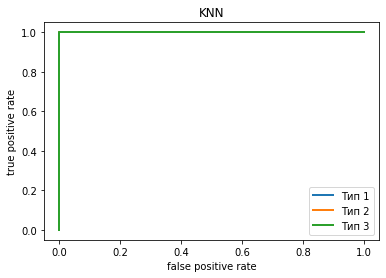

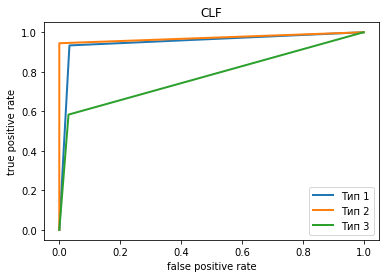

In [ ]:
fpr = dict()
tpr = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_bin_test[:, i], y_score_knn[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='Тип {}'.format(i+1))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("KNN")
plt.show()



for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_bin_test[:, i], y_score_clf[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='Тип {}'.format(i+1))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("CLF")
plt.show()